In [1]:
import numpy as np
import os
import cv2 as cv
from matplotlib import pyplot as plt

In [2]:
if os.path.exists("../imgs/miku.jpg"):
        miku = cv.imread("../imgs/miku.jpg")
        assert miku is not None, "file could not be read, check with os.path.exists()"
else:
        print("not found")

if os.path.exists("../imgs/hoi4.png"):
        hoi4 = cv.imread("../imgs/hoi4.png")
        assert hoi4 is not None, "file could not be read, check with os.path.exists()"
else:
        print("not found")

if os.path.exists("../imgs/hoi4_logo.jpg"):
        hoi4_logo = cv.imread("../imgs/hoi4_logo.jpg")
        assert hoi4_logo is not None, "file could not be read, check with os.path.exists()"
else:
        print("not found")

(253, 199, 3)


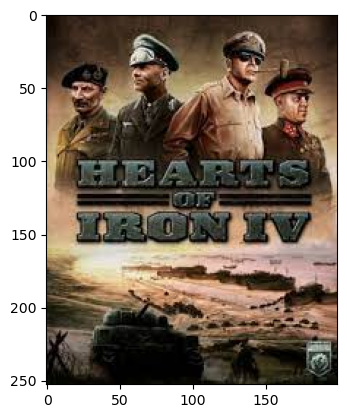

In [3]:
plt.imshow(cv.cvtColor(hoi4_logo, cv.COLOR_BGR2RGB))
#hoi4 = hoi4[0:1357]
print(hoi4_logo.shape)

(1357, 1920, 3)


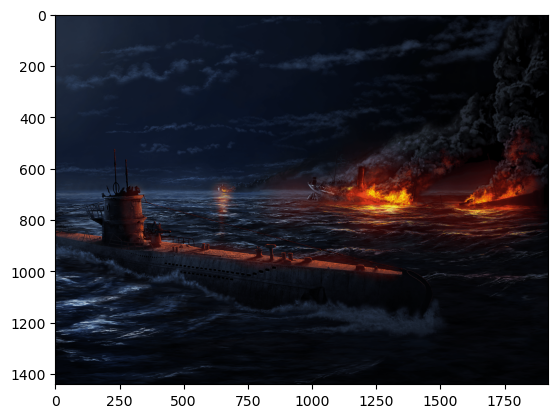

In [4]:
plt.imshow(cv.cvtColor(hoi4, cv.COLOR_BGR2RGB))
hoi4 = hoi4[0:1357]
print(hoi4.shape)

(1357, 1920, 3)


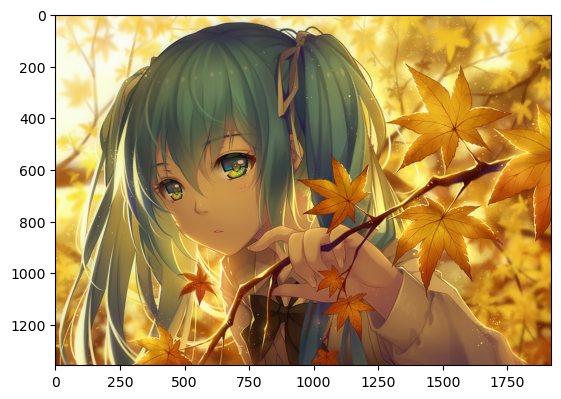

In [5]:

plt.imshow(cv.cvtColor(miku, cv.COLOR_BGR2RGB))
print(miku.shape)

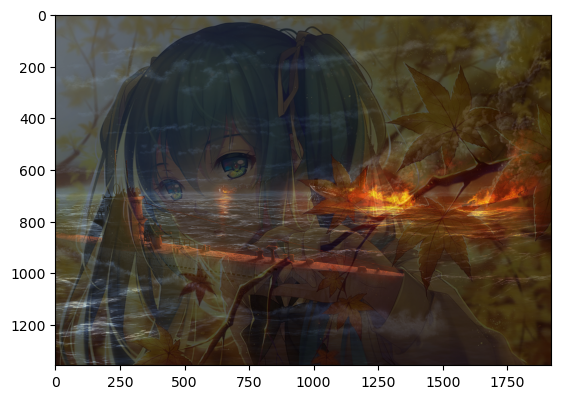

In [6]:
con = cv.addWeighted(miku, 0.3, hoi4, 0.7, 0)
plt.imshow(cv.cvtColor(con, cv.COLOR_BGR2RGB))

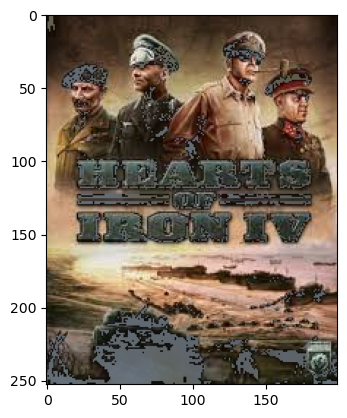

In [7]:
logo_row, logo_col, logo_channels = hoi4_logo.shape
roi = con[0:logo_row, 0:logo_col]

hoi4_logo_grey = cv.cvtColor(hoi4_logo, cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(hoi4_logo_grey, 10, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)


img2_fg = cv.bitwise_and(roi,roi,mask = mask_inv)
 
# Take only region of logo from logo image.
img1_bg = cv.bitwise_and(hoi4_logo, hoi4_logo, mask = mask)
 
# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)
con[0:logo_row, 0:logo_col ] = dst
 

plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))